<a href="https://colab.research.google.com/github/rkloe5813/MS-Data-Science_Analytical-Methods/blob/main/week2_exercise_Yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Reviews Analysis Using WordCloud

In [1]:
import pandas as pd
import numpy as np

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import matplotlib.pyplot as plt

In [33]:
% matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/rkloe5813/MS-Data-Science_Analytical-Methods/main/Yelp%20Reviews%20-%2010000(1).csv'

In [4]:
df1 = pd.read_csv(url)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   10000 non-null  object
 1   date          10000 non-null  object
 2   review_id     10000 non-null  object
 3   stars         10000 non-null  int64 
 4   text          10000 non-null  object
 5   type          10000 non-null  object
 6   user_id       10000 non-null  object
 7   cool          10000 non-null  int64 
 8   useful        10000 non-null  int64 
 9   funny         10000 non-null  int64 
 10  review_count  10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [14]:
# get the review in the first row of column 'text'
print(df1.iloc[0]['text'])
# get the stars rating for the first row of column 'stars'
print(df1.iloc[0]['stars'])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
5


In [17]:
# get only 2 columns: stars reviews and text reviews
df1[['stars', 'text']].head()


,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [18]:
# get an overview of the data set
print("There are {} observations and {} features in this dataset. \n".format(df1.shape[0],df1.shape[1]))

There are 10000 observations and 11 features in this dataset. 



In [24]:
# get the number of unique star ratings
print("There are {} types of star ratings in this dataset\n".format(len(df1.stars.unique())))


There are 5 types of star ratings in this dataset



In [28]:
# Groupby by star ratings
stars_count = df1.groupby("stars")

# Summary statistic of all star ratings
stars_count.describe().head()

cool                                ... review_count                      
        count      mean       std  min  25%  ...          min  25%  50%  75%    max
stars                                        ...                                   
1       749.0  0.576769  1.474759  0.0  0.0  ...          1.0  1.0  2.0  5.0  176.0
2       927.0  0.719525  1.491182  0.0  0.0  ...          1.0  1.0  3.0  7.0  176.0
3      1461.0  0.788501  1.602576  0.0  0.0  ...          1.0  2.0  4.0  8.0  176.0
4      3526.0  0.954623  2.034367  0.0  0.0  ...          1.0  2.0  4.0  8.0  176.0
5      3337.0  0.944261  2.484583  0.0  0.0  ...          1.0  2.0  4.0  8.0  176.0

[5 rows x 32 columns]

In [29]:
# summarize the top attributes by review count
stars_count.mean().sort_values(by='review_count',ascending=False).head()

,cool,useful,funny,review_count
stars,,,,
5,0.944261,1.381780,0.608631,9.649985
3,0.788501,1.306639,0.694730,9.075975
4,0.954623,1.395916,0.670448,8.840329
2,0.719525,1.563107,0.875944,8.047465
1,0.576769,1.604806,1.056075,7.157543


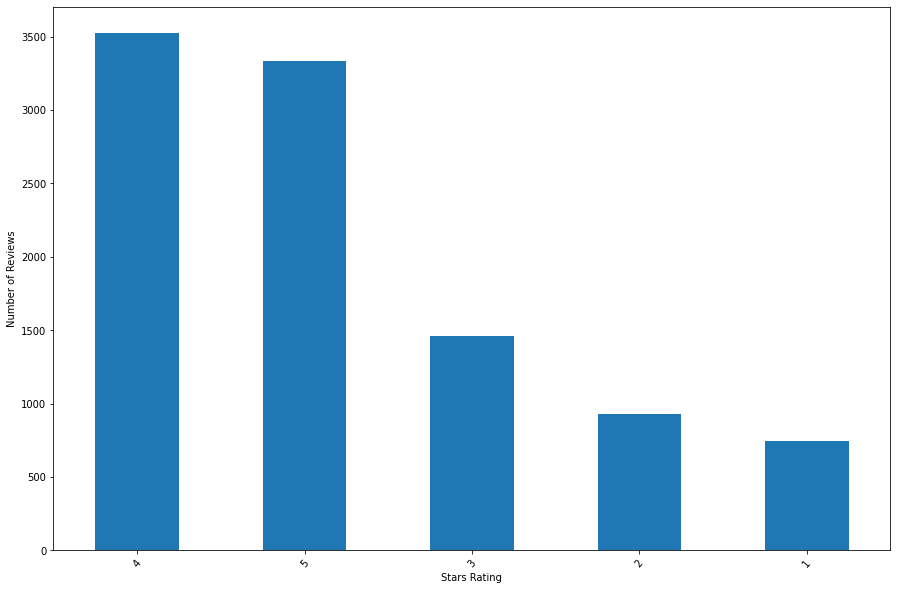

In [35]:
# plot the number of reviews by stars rating
plt.figure(figsize=(15,10))
stars_count.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Stars Rating")
plt.ylabel("Number of Reviews")
plt.show()

## Word Cloud

### 1 example

In [36]:
# get the required arguments for the function
?WordCloud

In [39]:
# as an example, start with the first review:
text = df1.text[0]
text

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [41]:
# now create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
wordcloud

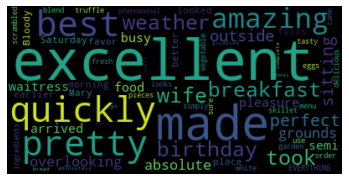

In [42]:
# finally, display the WordCloud generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

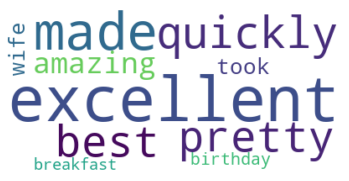

In [46]:
# make the wordcloud more easily readable
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=100, max_words=10, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
# save the image
wordcloud.to_file('first_review.png')

### all reviews combined

In [48]:
text = " ".join(review for review in df1.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 7117319 words in the combination of all review.


In [51]:
# get the built-in list of stopwords (aka words that are irrelevant to analysis):
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [56]:
# generate a word cloud image without the stopwords
wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=50, background_color="white").generate(text)
wordcloud

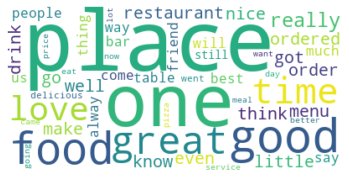

In [57]:
# Display the generated image with matplotlib to see if there are more words that should be filtered out
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
# update the list of stopwords with additional words that I want to filter out
stopwords.update(['us','go','even','know','say','day','place','one','thing','time','will','got','restaurant','think','make','now'])

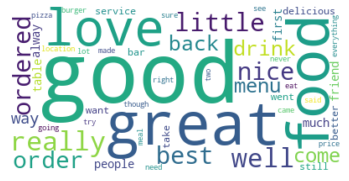

In [63]:
# rerun the wordcloud with the updated list of stopwords (this is an iterative process)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The next step would be to do analysis on those words.
That's for another day.

#The End